In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from libs.tools import *
from libs.network import *
import torch
from geopy.distance import geodesic
from scipy import spatial
import copy

/home/ids/yukliu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [3]:
meta_data = pd.read_csv('./data/dichasus.csv')
meta_data_2 = pd.read_csv('./data/Opendata_2.csv')
csi_cols = [col for col in meta_data.columns if col not in ['Unnamed: 0', 'time', 'x', 'y']]
csi_data = meta_data[csi_cols].values
locations = meta_data[['x', 'y']].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
scaler.fit(csi_data)
csi_data = scaler.transform(csi_data)
csi_data_2 = scaler.transform(csi_data_2)

In [5]:
csi_data_2 = meta_data_2[csi_cols].values
locations_2 = meta_data_2[['x', 'y']].values

# Load Model

In [51]:
m = torch.load(f'/home/ids/yukliu/checkpoints/Triplet_emb_{embed_dim}_m_2_bs_{bs}_{suffix}.sav')

In [7]:
bs = 256
embed_dim = 16
suffix = 'OpenDataTest_OfflineMining_42000'
start=512
hiddens = [int(start / (2 ** i)) for i in range(100) if start / (2 ** i) >= embed_dim]

embedding_net = ANN(1024, embed_dim, hiddens=hiddens)
triplet_net = TripletNet(embedding_net)
triplet_net.load_state_dict(torch.load(f'/home/ids/yukliu/OpenTest/checkpoints/Triplet_emb_{embed_dim}_m_2_bs_{bs}_{suffix}.sav'))


<All keys matched successfully>

# Channel Charting

In [8]:
csi_tensor = torch.FloatTensor(csi_data)
cc = triplet_net.get_embedding(csi_tensor)
cc_arr = cc.detach().numpy()

In [9]:
csi_tensor_2 = torch.FloatTensor(csi_data_2)
cc_2 = triplet_net.get_embedding(csi_tensor_2)
cc_arr_2 = cc_2.detach().numpy()

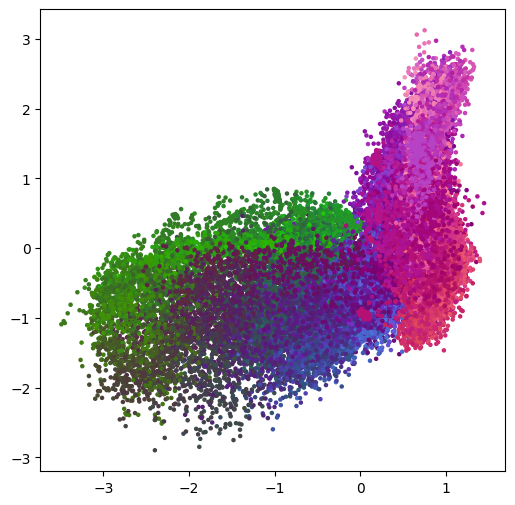

In [10]:
plot_colorized(locations, cc_arr)

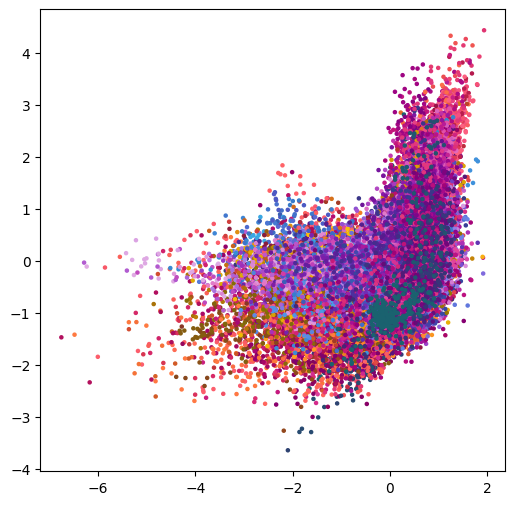

In [11]:
plot_colorized(locations_2, cc_arr_2)